<a href="https://colab.research.google.com/github/AARomanow/wiki/blob/main/Caltech101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

extract_path = "/content/caltech-101"  # Specify the desired extraction path

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

In [2]:
import os

# List files in the directory
files = os.listdir('/content')
print(files)


['.config', 'caltech-101', 'sample_data']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

drive_path = "/content/drive/MyDrive"  # Update the base path if needed

files = os.listdir(drive_path)
print(files)

['Preliminary App Issaquah 2009.gdoc', 'The Odyssey outline v4.gdoc', 'Essie Mind Map.gdraw', 'Copy of Essie Mind Map.gdraw', 'paragraph 2.docx', 'paragraph 2.docx.gdoc', 'Hospitality Topic.docx', 'Hospitality Topic.docx.gdoc', 'Hospitality Group Work.rtf', 'Hospitality Group Work.rtf.gdoc', 'Diet & Nutrition Questionnaire2.docx', 'Diet & Nutrition Questionnaire2.gdoc', 'Weekly Check In Form Basic Training and 6 Week Programs.docx', 'Weekly Check In Form Basic Training and 6 Week Programs.docx.gdoc', 'week 1 check in .webarchive', 'finalproject_v1.psd', 'finalprojectv2.psd', 'Blank Application.doc', 'Blank Application (1).doc.gdoc', 'Blank Application.doc.gdoc', 'Ali resume  .docx', 'Ali resume   (3).docx.gdoc', 'Ali resume   (2).docx.gdoc', 'Ali resume   (1).docx.gdoc', 'Ali resume  .docx.gdoc', 'referneces .gdoc', 'Ali resume  .gdoc', 'Personal Share - MASTER.gdoc', 'HO-CourseOutline.doc', 'predicted result graph.PNG', 'results 2.PNG', 'experiment 2 results graph.PNG', 'IMMI Grant No

In [5]:
import shutil

zip_file_path = "/content/drive/MyDrive/caltech-101.zip"  # Update with the path and name of your zip file
destination_path = "/content/caltech-101.zip"  # Update with the desired destination path and name in Colab

shutil.copy(zip_file_path, destination_path)

'/content/caltech-101.zip'

In [6]:
import zipfile

extract_path = "/content/extracted_files"  # Update with the desired extraction path

with zipfile.ZipFile(destination_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [7]:
import tarfile

# specify paths to the tar.gz files
objects_tar_gz = 'extracted_files/caltech-101/101_ObjectCategories.tar.gz'
annotations_tar = 'extracted_files/caltech-101/Annotations.tar'

# extract the object categories images
with tarfile.open(objects_tar_gz, 'r:gz') as tar:
    tar.extractall(path='extracted_files/caltech-101')

# extract the annotations
with tarfile.open(annotations_tar, 'r:') as tar:
    tar.extractall(path='extracted_files/caltech-101')

In [10]:
base_dir = 'extracted_files/caltech-101/101_ObjectCategories'

In [11]:
original_image_dir = "extracted_files/caltech-101/101_ObjectCategories"
annotation_dir = "extracted_files/caltech-101/Annotations"
split_dataset_dir = "caltech-101" 

In [12]:
import os
from sklearn.model_selection import train_test_split

# Path to the extracted files
data_path = 'extracted_files/caltech-101/101_ObjectCategories'
annotations_path = 'extracted_files1/caltech-101/Annotations'

# Get a list of all image file paths
image_files = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('.jpg'):
            image_files.append(os.path.join(root, file))

# Split the data into train, validation, and test sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
train_files, val_files = train_test_split(train_files, test_size=0.2, random_state=42)

# Move the files to their respective directories
train_dir = 'extracted_files/train'
val_dir = 'extracted_files/validation'
test_dir = 'extracted_files/test'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Move train files
for file in train_files:
    target_path = os.path.join(train_dir, os.path.relpath(file, data_path))
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    os.rename(file, target_path)

# Move validation files
for file in val_files:
    target_path = os.path.join(val_dir, os.path.relpath(file, data_path))
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    os.rename(file, target_path)

# Move test files
for file in test_files:
    target_path = os.path.join(test_dir, os.path.relpath(file, data_path))
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    os.rename(file, target_path)


In [13]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA

# Path to the pre-split train, validation, and test directories
train_dir = 'extracted_files/train'
val_dir = 'extracted_files/validation'
test_dir = 'extracted_files/test'

# Parameters for image resizing and PCA
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images, train_labels = preprocess_images(train_dir)

# Preprocess validation data
val_images, val_labels = preprocess_images(val_dir)

# Preprocess test data
test_images, test_labels = preprocess_images(test_dir)

# Combine train and validation data for PCA
combined_images = np.vstack((train_images, val_images))

# Create an instance of PCA
pca = PCA(n_components=100)  # Specify the number of components to keep

# Fit PCA on the combined data
pca.fit(combined_images)

# Transform train and test data to the lower-dimensional space
train_images_pca = pca.transform(train_images)
test_images_pca = pca.transform(test_images)

# Access the explained variance ratio and principal components
explained_variance_ratio = pca.explained_variance_ratio_
principal_components = pca.components_

# Print the explained variance ratio and principal components
print("Explained Variance Ratio:", explained_variance_ratio)
print("Principal Components:", principal_components)


Explained Variance Ratio: [0.39312314 0.07279291 0.04896842 0.02850216 0.02374918 0.02331716
 0.01719477 0.01412625 0.01282063 0.0110134  0.00984665 0.0086458
 0.00840823 0.00692379 0.00682126 0.00655939 0.00628492 0.00556437
 0.00492835 0.00476835 0.00467249 0.00387925 0.00365344 0.00344925
 0.00332198 0.00313552 0.00305401 0.00296101 0.00291859 0.00279283
 0.0026477  0.00258826 0.00249349 0.00232289 0.0022856  0.00215456
 0.00208053 0.0019734  0.00193534 0.0019025  0.00184621 0.00180963
 0.00175118 0.00170053 0.00166015 0.00162045 0.00155291 0.00150931
 0.00150086 0.00144637 0.00142366 0.00137829 0.00136185 0.0013307
 0.00131552 0.00128495 0.00125429 0.00123462 0.00120694 0.00118099
 0.00115506 0.00114524 0.00109545 0.00108432 0.00107342 0.0010519
 0.00102114 0.00100589 0.00098864 0.00097909 0.00094757 0.00093942
 0.00091615 0.00090913 0.00090281 0.00089186 0.00086413 0.00085867
 0.00084991 0.00081828 0.00081013 0.00079803 0.00078531 0.00077574
 0.00077017 0.00075383 0.00074859 0.000

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)  # Specify the number of neighbors (k)

# Fit the KNN classifier on the train data
knn.fit(train_images_pca, train_labels)

# Predict the labels for the test data
predictions = knn.predict(test_images_pca)

# Evaluate the accuracy of the KNN classifier
accuracy = knn.score(test_images_pca, test_labels)

# Print the predictions and accuracy
print("Predictions:", predictions)
print("Accuracy:", accuracy)


Predictions: ['Faces_easy' 'Motorbikes' 'Faces_easy' ... 'Faces_easy' 'Faces_easy'
 'Faces']
Accuracy: 0.18534718425369054


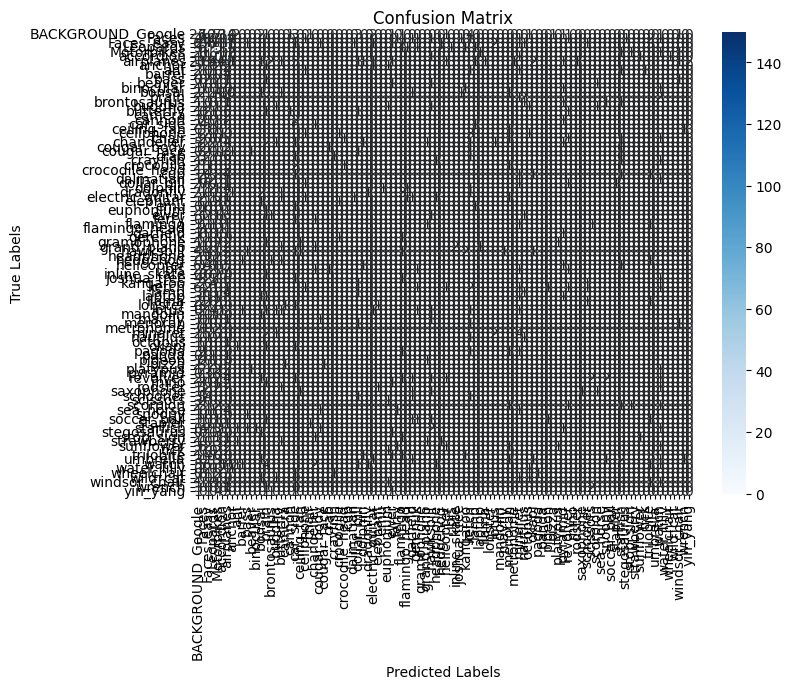

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Get the unique class labels
unique_labels = np.unique(test_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(test_labels, predictions)

# Print the classification report
print(report)


                   precision    recall  f1-score   support

BACKGROUND_Google       0.11      0.27      0.15        97
            Faces       0.14      0.29      0.18        97
       Faces_easy       0.14      0.33      0.20        92
         Leopards       0.15      0.41      0.22        29
       Motorbikes       0.57      0.86      0.69       175
        accordion       0.00      0.00      0.00         6
        airplanes       0.19      0.41      0.26       166
           anchor       0.00      0.00      0.00        15
              ant       0.00      0.00      0.00        13
           barrel       0.00      0.00      0.00         7
             bass       0.00      0.00      0.00         8
           beaver       0.00      0.00      0.00         8
        binocular       0.00      0.00      0.00         6
           bonsai       0.08      0.04      0.05        25
            brain       0.12      0.19      0.14        16
     brontosaurus       0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV 

# Path to the preprocessed train and test directories
train_dir = 'extracted_files/train'
test_dir = 'extracted_files/test'

# Parameters for image resizing
image_size = (64, 64)  # Desired image size for resizing

# Function to load and preprocess images from a directory
def preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            image_path = os.path.join(label_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, image_size)
            image = image.flatten()  # Flatten the image into a 1D array
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess train data
train_images_pca, train_labels = preprocess_images(train_dir)

# Preprocess test data
test_images_pca, test_labels = preprocess_images(test_dir)

# Split the train data into train and validation sets
train_images_pca, val_images, train_labels, val_labels = train_test_split(
    train_images_pca, train_labels, test_size=0.2, random_state=42
)

param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 4, 5, 6], 'kernel': ['poly']},
 ]
svm = SVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(train_images_pca, train_labels)
grid_search.cv_results_

# Create an instance of SVM classifier
svm = SVC()

# Fit the SVM classifier on the train data
svm.fit(train_images_pca, train_labels)

# Predict the labels for the validation data
val_predictions = svm.predict(val_images)

# Evaluate accuracy on the validation set
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Predict the labels for the test data
test_predictions = svm.predict(test_images_pca)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Generate classification report on the test set
classification_rep = classification_report(test_labels, test_predictions)
print("Classification Report:\n", classification_rep)


Validation Accuracy: 0.4184457728437233
Test Accuracy: 0.4084199015855659
Classification Report:
                    precision    recall  f1-score   support

BACKGROUND_Google       0.10      0.63      0.18        97
            Faces       0.49      0.85      0.62        97
       Faces_easy       0.94      0.95      0.94        92
         Leopards       0.78      0.97      0.86        29
       Motorbikes       0.79      0.92      0.85       175
        accordion       0.67      0.67      0.67         6
        airplanes       0.42      0.97      0.59       166
           anchor       0.00      0.00      0.00        15
              ant       0.00      0.00      0.00        13
           barrel       0.00      0.00      0.00         7
             bass       0.00      0.00      0.00         8
           beaver       0.00      0.00      0.00         8
        binocular       0.00      0.00      0.00         6
           bonsai       0.28      0.20      0.23        25
            brai

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


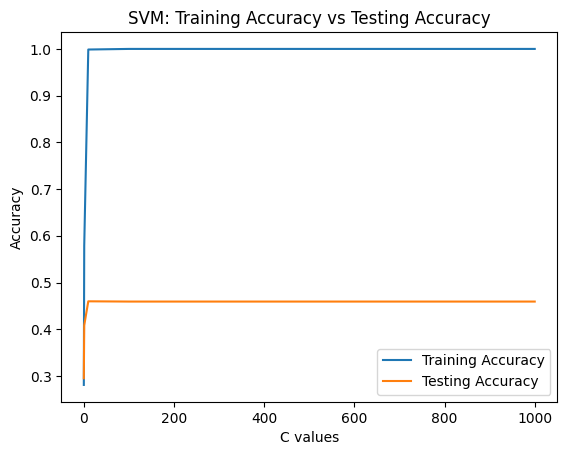

In [24]:
import matplotlib.pyplot as plt

# Range of C values to evaluate
c_values = [0.1, 1, 10, 100, 1000]

# Lists to store the training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different C values
for c in c_values:
    # Create an instance of SVM classifier with the current C value
    svm = SVC(C=c)
    
    # Fit the SVM classifier on the train data
    svm.fit(train_images, train_labels)
    
    # Predict the labels for the train data
    train_predictions = svm.predict(train_images)
    
    # Predict the labels for the test data
    test_predictions = svm.predict(test_images)
    
    # Compute and store the training accuracy
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_accuracies.append(train_accuracy)
    
    # Compute and store the testing accuracy
    test_accuracy = accuracy_score(test_labels, test_predictions)
    test_accuracies.append(test_accuracy)

# Plot the training and testing accuracies
plt.plot(c_values, train_accuracies, label='Training Accuracy')
plt.plot(c_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('SVM: Training Accuracy vs Testing Accuracy')
plt.legend()
plt.show()
